In [6]:
state<- read.csv(file='state.csv')
state

State,Population,Murder.Rate,Abbreviation
Alabama,4779736,5.7,AL
Alaska,710231,5.6,AK
Arizona,6392017,4.7,AZ
Arkansas,2915918,5.6,AR
California,37253956,4.4,CA
Colorado,5029196,2.8,CO
Connecticut,3574097,2.4,CT
Delaware,897934,5.8,DE
Florida,18801310,5.8,FL
Georgia,9687653,5.7,GA


In [10]:
mean(state[['Population']])
mean(state[['Population']], trim=0.1)

[1] 6162876

[1] 4783697

#### average murder rate fro country

In [16]:
#install.packages('matrixStats')
library('matrixStats')

In [18]:
weighted.mean(state[['Murder.Rate']], w= state[['Population']])
weightedMedian(state[['Murder.Rate']], w= state[['Population']])

[1] 4.445834

[1] 4.4

## Percentiles and Boxplots


In [24]:
quantile(state[['Murder.Rate']], p=c(.05, .25, .5, .95))

5%   25%   50%   95% 
1.600 2.425 4.000 6.510

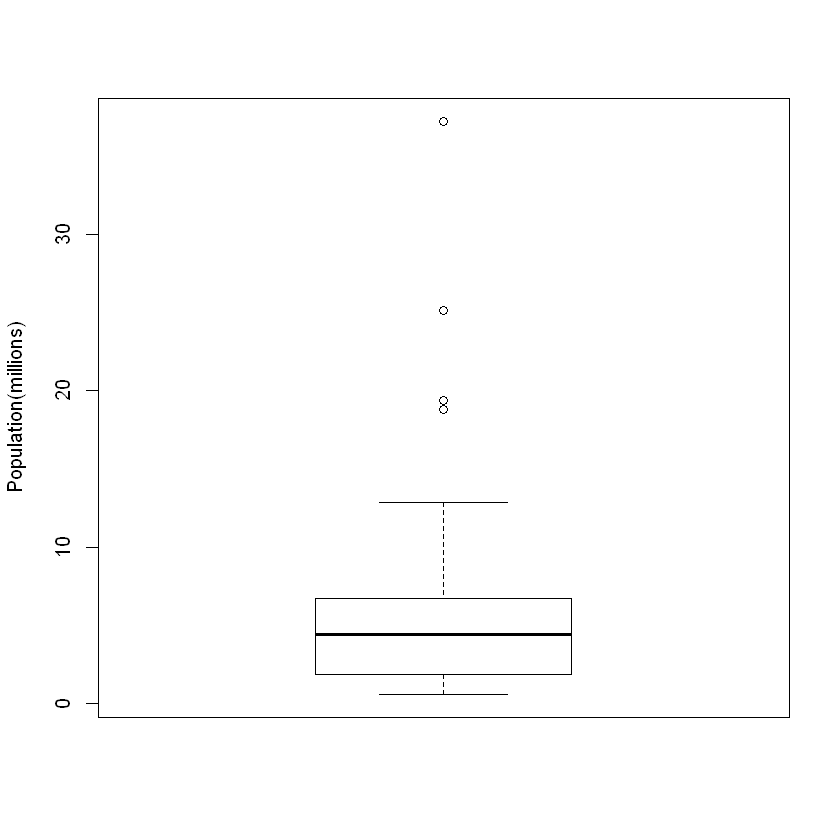

In [25]:
boxplot(state[['Population']]/1000000, ylab='Population(millions)')